In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [7]:
#not needed optional
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

CUSTOMERID :  7043
customerID
7590-VHVEG    1
9237-HQITU    1
9305-CDSKC    1
1452-KIOVK    1
6713-OKOMC    1
             ..
8361-LTMKD    1
1122-JWTJW    1
4807-IZYOZ    1
6894-LFHLY    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64


GENDER :  2
gender
Female    3488
Male      3555
Name: count, dtype: int64


PARTNER :  2
Partner
Yes    3402
No     3641
Name: count, dtype: int64


DEPENDENTS :  2
Dependents
Yes    2110
No     4933
Name: count, dtype: int64


PHONESERVICE :  2
PhoneService
No      682
Yes    6361
Name: count, dtype: int64


MULTIPLELINES :  3
MultipleLines
No phone service     682
Yes                 2971
No                  3390
Name: count, dtype: int64


INTERNETSERVICE :  3
InternetService
No             1526
DSL            2421
Fiber optic    3096
Name: count, dtype: int64


ONLINESECURITY :  3
OnlineSecurity
No internet service    1526
Yes                    2019
No                     3498
Name: count, dtype: int64


ONLINEBACKUP :  3
OnlineBackup
N

In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
binary_map = {'Yes':1, 'No':0, 'Male':1, 'Female':0}
df['gender'] = df['gender'].map(binary_map)
df['Partner'] = df['Partner'].map({'Yes':1,'No':0})
df['Dependents'] = df['Dependents'].map({'Yes':1,'No':0})
df['PhoneService'] = df['PhoneService'].map({'Yes':1,'No':0})
df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes':1,'No':0})


In [10]:
multi_cols = [
    'MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
    'DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
    'Contract','PaymentMethod'
]

# Create dummy variables
df = pd.get_dummies(df, columns=multi_cols, drop_first=True)

# Identify dummy columns (they will start with the names in multi_cols)
dummy_cols = [col for col in df.columns if any(col.startswith(mc+'_') for mc in multi_cols)]

# Convert only dummy columns to uint8 (0/1)
df[dummy_cols] = df[dummy_cols].astype('uint8')



In [11]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,0,0,0,0,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.5,...,0,0,0,0,0,1,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,0,0,0,0,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,1,0,0,0,0,1,0,0,0,0
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,0,0,0,0,0,0,0,0,1,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   gender                                 7043 non-null   int64  
 2   SeniorCitizen                          7043 non-null   int64  
 3   Partner                                7043 non-null   int64  
 4   Dependents                             7043 non-null   int64  
 5   tenure                                 7043 non-null   int64  
 6   PhoneService                           7043 non-null   int64  
 7   PaperlessBilling                       7043 non-null   int64  
 8   MonthlyCharges                         7043 non-null   float64
 9   TotalCharges                           7043 non-null   object 
 10  Churn                                  7043 non-null   object 
 11  Mult

In [13]:
# Drop customerID column
df.drop('customerID', axis=1, inplace=True)

# Convert TotalCharges to float (handle non-numeric safely)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# If there are nulls (like the 11 blanks), replace with mean
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

# Convert Churn to category dtype
df['Churn'] = df['Churn'].astype('category')

# Verify changes
print(df.dtypes)
print(df['Churn'].cat.categories if df['Churn'].dtype.name == 'category' else "Not categorical")


gender                                      int64
SeniorCitizen                               int64
Partner                                     int64
Dependents                                  int64
tenure                                      int64
PhoneService                                int64
PaperlessBilling                            int64
MonthlyCharges                            float64
TotalCharges                              float64
Churn                                    category
MultipleLines_No phone service              uint8
MultipleLines_Yes                           uint8
InternetService_Fiber optic                 uint8
InternetService_No                          uint8
OnlineSecurity_No internet service          uint8
OnlineSecurity_Yes                          uint8
OnlineBackup_No internet service            uint8
OnlineBackup_Yes                            uint8
DeviceProtection_No internet service        uint8
DeviceProtection_Yes                        uint8


In [14]:
df.isnull().sum()

gender                                   0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV

In [15]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

In [16]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,No,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,No,...,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,Yes,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,No,...,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,Yes,...,0,0,0,0,0,0,0,0,1,0


In [17]:
df.groupby(["Churn"]).count()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No phone service,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
Churn,,,,,,,,,,,,,,,,,,,,,
No,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174,...,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174
Yes,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,...,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869


In [18]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
gender,7043.0,0.504756,0.500013,0.00,0.000,1.00,1.00,1.00
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.000,0.00,0.00,1.00
Partner,7043.0,0.483033,0.499748,0.00,0.000,0.00,1.00,1.00
Dependents,7043.0,0.299588,0.458110,0.00,0.000,0.00,1.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.000,29.00,55.00,72.00
PhoneService,7043.0,0.903166,0.295752,0.00,1.000,1.00,1.00,1.00
PaperlessBilling,7043.0,0.592219,0.491457,0.00,0.000,1.00,1.00,1.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.500,70.35,89.85,118.75
TotalCharges,7043.0,2283.300441,2265.000258,18.80,402.225,1400.55,3786.60,8684.80
MultipleLines_No phone service,7043.0,0.096834,0.295752,0.00,0.000,0.00,0.00,1.00


In [19]:
# Create a separate dataframe consisting only of the features
#i.e independent attributes

feature_df = df.drop(labels= "Churn" , axis = 1)

In [20]:
feature_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No phone service,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,1,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,1,...,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,0,...,0,0,0,0,0,0,0,0,1,0


In [21]:
# convert the features into z scores as we do not know what units / scales were used and store them in new dataframe
# It is always adviced to scale numeric attributes in models that calculate distances.
feature_df_2 = feature_df.apply(zscore)  # convert all attributes to Z scale 

feature_df_2.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No phone service,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,...,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03
mean,-2.219500e-17,-4.842546e-17,7.162933e-17,1.069396e-16,-2.421273e-17,7.869137e-17,-5.952296e-17,-6.406285e-17,8.070910e-17,-5.649637e-17,...,8.222240e-17,1.437631e-17,-3.278807e-18,1.437631e-17,3.934569e-17,-4.136341e-17,-4.439000e-17,-1.003819e-16,3.556245e-17,2.219500e-17
std,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,...,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00
min,-1.009559e+00,-4.399165e-01,-9.666223e-01,-6.540119e-01,-1.318165e+00,-3.054010e+00,-1.205113e+00,-1.545860e+00,-9.998503e-01,-3.274383e-01,...,-6.394386e-01,-5.259274e-01,-7.901317e-01,-5.259274e-01,-7.960701e-01,-5.142494e-01,-5.629751e-01,-5.250473e-01,-7.110260e-01,-5.448069e-01
25%,-1.009559e+00,-4.399165e-01,-9.666223e-01,-6.540119e-01,-9.516817e-01,3.274383e-01,-1.205113e+00,-9.725399e-01,-8.305558e-01,-3.274383e-01,...,-6.394386e-01,-5.259274e-01,-7.901317e-01,-5.259274e-01,-7.960701e-01,-5.142494e-01,-5.629751e-01,-5.250473e-01,-7.110260e-01,-5.448069e-01
50%,9.905318e-01,-4.399165e-01,-9.666223e-01,-6.540119e-01,-1.372744e-01,3.274383e-01,8.297975e-01,1.857327e-01,-3.897629e-01,-3.274383e-01,...,-6.394386e-01,-5.259274e-01,-7.901317e-01,-5.259274e-01,-7.960701e-01,-5.142494e-01,-5.629751e-01,-5.250473e-01,-7.110260e-01,-5.448069e-01
75%,9.905318e-01,-4.399165e-01,1.034530e+00,1.529024e+00,9.214551e-01,3.274383e-01,8.297975e-01,8.338335e-01,6.637555e-01,-3.274383e-01,...,1.563872e+00,-5.259274e-01,1.265612e+00,-5.259274e-01,1.256171e+00,-5.142494e-01,-5.629751e-01,-5.250473e-01,1.406418e+00,-5.448069e-01
max,9.905318e-01,2.273159e+00,1.034530e+00,1.529024e+00,1.613701e+00,3.274383e-01,8.297975e-01,1.794352e+00,2.826469e+00,3.054010e+00,...,1.563872e+00,1.901403e+00,1.265612e+00,1.901403e+00,1.256171e+00,1.944582e+00,1.776278e+00,1.904590e+00,1.406418e+00,1.835513e+00


In [22]:
# Capture the class values from the 'diagnosis' column into a pandas series akin to array 

bc_labels = df["Churn"]

In [23]:
# store the normalized features data into np array 

X = np.array(feature_df_2)
X.shape

#Not necessary to convert to array
#since few algorithms works only on arrays 
#diff between array and dataframe, an array is df without the column headers

(7043, 30)

In [24]:
# store the bc_labels data into a separate np array

y = np.array(bc_labels)
y.shape

(7043,)

In [25]:
import numpy as np

monthly_charges = X[:, 7]   # adjust index if different
total_charges   = X[:, 8]   # adjust index if different

# IQR method
for col_name, col_data in zip(['MonthlyCharges','TotalCharges'], [monthly_charges, total_charges]):
    Q1 = np.percentile(col_data, 25)
    Q3 = np.percentile(col_data, 75)
    IQR = Q3 - Q1

    outliers = ((col_data < (Q1 - 1.5 * IQR)) | (col_data > (Q3 + 1.5 * IQR)))
    print(f"{col_name} outlier count: {np.sum(outliers)}")


MonthlyCharges outlier count: 0
TotalCharges outlier count: 0


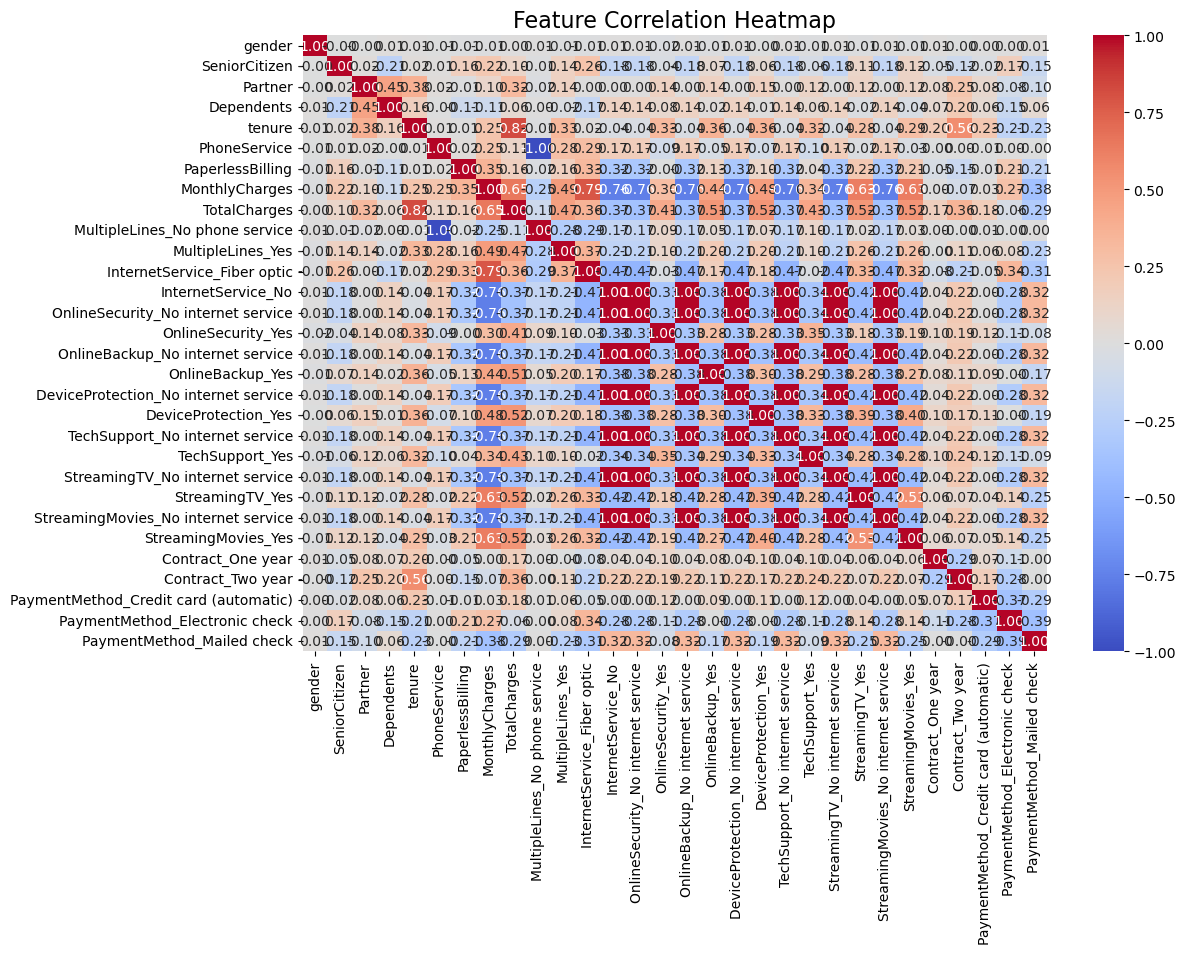

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# If X is a NumPy array, convert to DataFrame for better labeling
X_df = pd.DataFrame(X, columns=feature_df_2.columns)  # use your feature names

plt.figure(figsize=(12, 8))
sns.heatmap(X_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Feature Correlation Heatmap", fontsize=16)
plt.show()


In [27]:
import pandas as pd

# Assuming your features are in a DataFrame
corr_matrix = feature_df_2.corr().abs()   # absolute correlation values


In [28]:
upper = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)


In [29]:
threshold = 0.9
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print("Highly correlated features to drop:", to_drop)


Highly correlated features to drop: ['MultipleLines_No phone service', 'OnlineSecurity_No internet service', 'OnlineBackup_No internet service', 'DeviceProtection_No internet service', 'TechSupport_No internet service', 'StreamingTV_No internet service', 'StreamingMovies_No internet service']


In [30]:
feature_df_2_reduced = feature_df_2.drop(columns=to_drop)


In [31]:
# Features (already reduced, no Churn column)
X = feature_df_2_reduced  

# Target labels (already stored separately)
y = bc_labels


In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [34]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

print("Before SMOTE:", dict(zip(*np.unique(y_train, return_counts=True))))
print("After SMOTE:", dict(zip(*np.unique(y_train_res, return_counts=True))))

Before SMOTE: {'No': 3622, 'Yes': 1308}
After SMOTE: {'No': 3622, 'Yes': 3622}


In [35]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=11, weights='uniform')
knn.fit(X_train_res, y_train_res)

KNeighborsClassifier(n_neighbors=11)

In [36]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = knn.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1012  540]
 [ 102  459]]
              precision    recall  f1-score   support

          No       0.91      0.65      0.76      1552
         Yes       0.46      0.82      0.59       561

    accuracy                           0.70      2113
   macro avg       0.68      0.74      0.67      2113
weighted avg       0.79      0.70      0.71      2113



In [96]:
from sklearn.metrics import classification_report, confusion_matrix

y_train_pred = knn.predict(X_train_res)
print("Training Confusion Matrix:\n", confusion_matrix(y_train_res, y_train_pred))
print("Training Classification Report:\n", classification_report(y_train_res, y_train_pred))


Training Confusion Matrix:
 [[3622    0]
 [   4 3618]]
Training Classification Report:
               precision    recall  f1-score   support

          No       1.00      1.00      1.00      3622
         Yes       1.00      1.00      1.00      3622

    accuracy                           1.00      7244
   macro avg       1.00      1.00      1.00      7244
weighted avg       1.00      1.00      1.00      7244



In [38]:
# Get probabilities for the positive class ("Yes")
y_proba = knn.predict_proba(X_test_scaled)[:, 1]


In [39]:
import numpy as np

threshold = 0.4
y_pred_thresh = np.where(y_proba >= threshold, "Yes", "No")


In [40]:
from sklearn.metrics import confusion_matrix, classification_report

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_thresh))
print("Classification Report:\n", classification_report(y_test, y_pred_thresh))


Confusion Matrix:
 [[915 637]
 [ 71 490]]
Classification Report:
               precision    recall  f1-score   support

          No       0.93      0.59      0.72      1552
         Yes       0.43      0.87      0.58       561

    accuracy                           0.66      2113
   macro avg       0.68      0.73      0.65      2113
weighted avg       0.80      0.66      0.68      2113



In [41]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier

k_values = [3,5,7,9,11,13,15]

for w in ['uniform', 'distance']:
    print(f"\nWeighting strategy: {w}")
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, weights=w)
        
        # Cross-validation predictions
        y_pred = cross_val_predict(knn, X_train_res, y_train_res, cv=5)
        
        # Metrics for churners ("Yes") class
        prec = precision_score(y_train_res, y_pred, pos_label="Yes")
        rec  = recall_score(y_train_res, y_pred, pos_label="Yes")
        f1   = f1_score(y_train_res, y_pred, pos_label="Yes")
        
        print(f"k={k}: Precision={prec:.3f}, Recall={rec:.3f}, F1={f1:.3f}")



Weighting strategy: uniform
k=3: Precision=0.749, Recall=0.914, F1=0.823
k=5: Precision=0.738, Recall=0.912, F1=0.816
k=7: Precision=0.731, Recall=0.911, F1=0.811
k=9: Precision=0.724, Recall=0.906, F1=0.805
k=11: Precision=0.720, Recall=0.904, F1=0.802
k=13: Precision=0.716, Recall=0.901, F1=0.798
k=15: Precision=0.712, Recall=0.897, F1=0.794

Weighting strategy: distance
k=3: Precision=0.760, Recall=0.919, F1=0.832
k=5: Precision=0.752, Recall=0.923, F1=0.829
k=7: Precision=0.743, Recall=0.924, F1=0.824
k=9: Precision=0.739, Recall=0.923, F1=0.821
k=11: Precision=0.735, Recall=0.923, F1=0.819
k=13: Precision=0.732, Recall=0.923, F1=0.817
k=15: Precision=0.729, Recall=0.921, F1=0.814


In [42]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier

k_values = [3,5,7,9,11,13,15]

for w in ['uniform', 'distance']:
    print(f"\nWeighting strategy: {w}")
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, weights=w)
        
        # Fit on training set
        knn.fit(X_train_res, y_train_res)
        
        # Predict on test set
        y_pred = knn.predict(X_test_scaled)
        
        # Metrics for churners ("Yes") class
        prec = precision_score(y_test, y_pred, pos_label="Yes")
        rec  = recall_score(y_test, y_pred, pos_label="Yes")
        f1   = f1_score(y_test, y_pred, pos_label="Yes")
        
        print(f"k={k}: Precision={prec:.3f}, Recall={rec:.3f}, F1={f1:.3f}")



Weighting strategy: uniform
k=3: Precision=0.456, Recall=0.688, F1=0.548
k=5: Precision=0.460, Recall=0.738, F1=0.567
k=7: Precision=0.461, Recall=0.788, F1=0.582
k=9: Precision=0.461, Recall=0.807, F1=0.587
k=11: Precision=0.459, Recall=0.818, F1=0.588
k=13: Precision=0.461, Recall=0.834, F1=0.594
k=15: Precision=0.457, Recall=0.836, F1=0.591

Weighting strategy: distance
k=3: Precision=0.458, Recall=0.631, F1=0.531
k=5: Precision=0.464, Recall=0.679, F1=0.551
k=7: Precision=0.461, Recall=0.702, F1=0.556
k=9: Precision=0.465, Recall=0.729, F1=0.568
k=11: Precision=0.463, Recall=0.734, F1=0.568
k=13: Precision=0.467, Recall=0.758, F1=0.577
k=15: Precision=0.462, Recall=0.761, F1=0.575


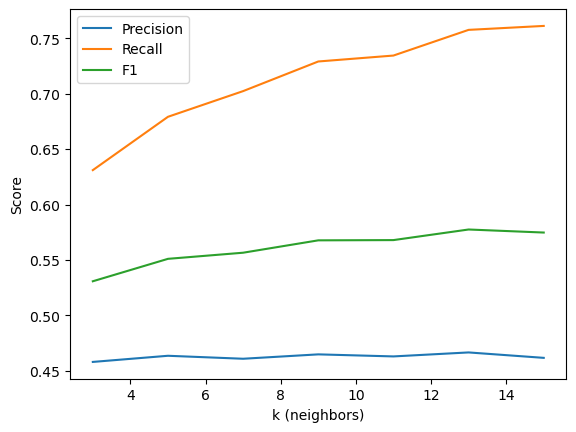

In [43]:
import matplotlib.pyplot as plt

k_values = [3,5,7,9,11,13,15]
precisions, recalls, f1s = [], [], []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn.fit(X_train_res, y_train_res)
    y_pred = knn.predict(X_test_scaled)
    
    precisions.append(precision_score(y_test, y_pred, pos_label="Yes"))
    recalls.append(recall_score(y_test, y_pred, pos_label="Yes"))
    f1s.append(f1_score(y_test, y_pred, pos_label="Yes"))

plt.plot(k_values, precisions, label="Precision")
plt.plot(k_values, recalls, label="Recall")
plt.plot(k_values, f1s, label="F1")
plt.xlabel("k (neighbors)")
plt.ylabel("Score")
plt.legend()
plt.show()


ROC AUC: 0.7813562397780105


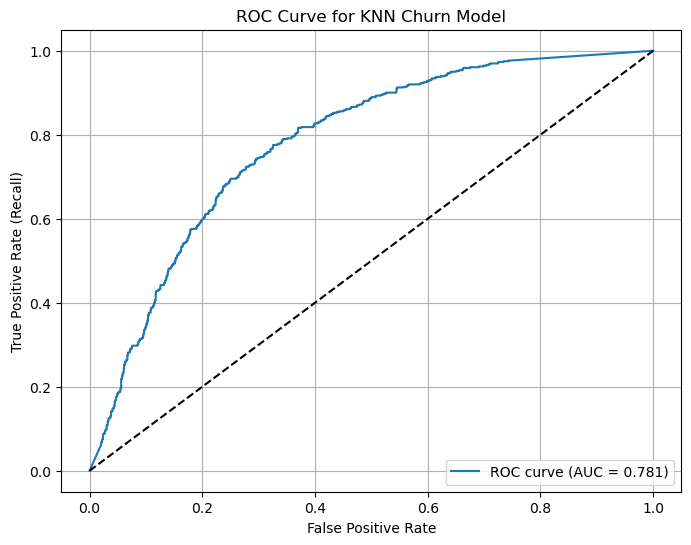

In [88]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class ("Yes")
y_proba = knn.predict_proba(X_test_scaled)[:, 1]

# Compute ROC AUC
roc_auc = roc_auc_score(y_test, y_proba, average="macro")
print("ROC AUC:", roc_auc)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba, pos_label="Yes")
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.3f})")
plt.plot([0,1], [0,1], 'k--')  # diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve for KNN Churn Model")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


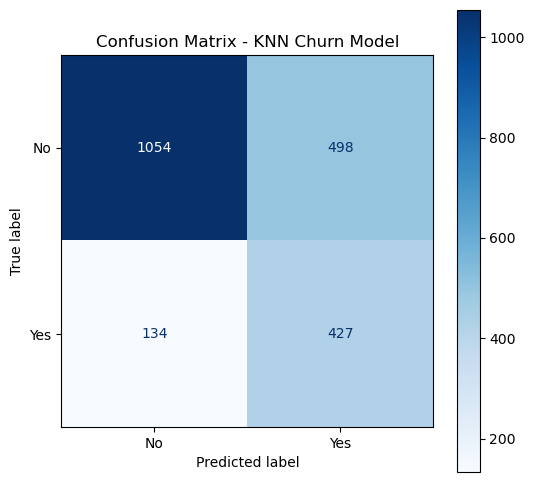

In [90]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=["No", "Yes"])

# Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No", "Yes"])
fig, ax = plt.subplots(figsize=(6,6))
disp.plot(cmap="Blues", ax=ax, values_format="d")
plt.title("Confusion Matrix - KNN Churn Model")
plt.show()


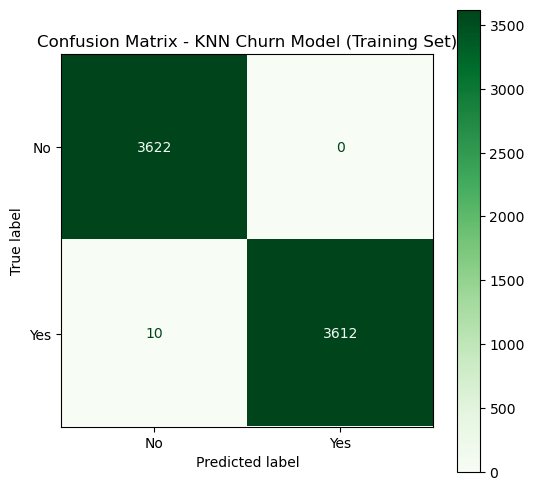

In [92]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Predict on training set
y_train_pred = knn.predict(X_train_res)

# Confusion matrix for training set
cm_train = confusion_matrix(y_train_res, y_train_pred, labels=["No", "Yes"])

# Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=["No", "Yes"])
fig, ax = plt.subplots(figsize=(6,6))
disp.plot(cmap="Greens", ax=ax, values_format="d")
plt.title("Confusion Matrix - KNN Churn Model (Training Set)")
plt.show()


In [94]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Try different metrics and leaf sizes
metrics = ["euclidean", "manhattan", "chebyshev", "cosine"]
leaf_sizes = [20, 30, 40]

for m in metrics:
    for ls in leaf_sizes:
        knn = KNeighborsClassifier(n_neighbors=9, weights="distance",
                                   metric=m, leaf_size=ls)
        knn.fit(X_train_res, y_train_res)
        y_pred = knn.predict(X_test_scaled)
        print(f"Metric={m}, Leaf Size={ls}")
        print(classification_report(y_test, y_pred, target_names=["No","Yes"]))
        print("-"*50)


Metric=euclidean, Leaf Size=20
              precision    recall  f1-score   support

          No       0.88      0.70      0.78      1552
         Yes       0.46      0.73      0.57       561

    accuracy                           0.71      2113
   macro avg       0.67      0.71      0.67      2113
weighted avg       0.77      0.71      0.72      2113

--------------------------------------------------
Metric=euclidean, Leaf Size=30
              precision    recall  f1-score   support

          No       0.88      0.70      0.78      1552
         Yes       0.46      0.73      0.57       561

    accuracy                           0.71      2113
   macro avg       0.67      0.71      0.67      2113
weighted avg       0.77      0.71      0.72      2113

--------------------------------------------------
Metric=euclidean, Leaf Size=40
              precision    recall  f1-score   support

          No       0.88      0.70      0.78      1552
         Yes       0.46      0.73      0.5